Assignment 13

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [5]:
file_path = 'heart_disease.csv'
df= pd.read_csv(file_path)

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [8]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [9]:
missing_values = df.isnull().sum()

In [10]:
print(df.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [11]:
df = df.drop_duplicates()

In [12]:
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    unique_values = df[column].unique()
    print("\nUnique Values in", column, ":", unique_values)


Unique Values in sex : ['Male' 'Female']

Unique Values in cp : ['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']

Unique Values in restecg : ['lv hypertrophy' 'normal' 'st-t abnormality']

Unique Values in exang : ['FALSE' 'TRUE' 'TURE']

Unique Values in slope : ['downsloping' 'flat' 'upsloping']

Unique Values in thal : ['fixed defect' 'normal' 'reversable defect']


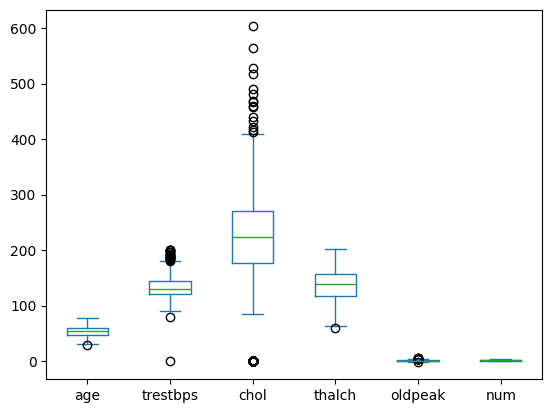

In [13]:
df.plot(kind='box')
plt.show()

In [14]:
def replace_outliers(series):
    if np.issubdtype(series.dtype, np.number):  # Check if the series is numeric
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        series[series < lower_bound] = series[series >= lower_bound].min()
        series[series > upper_bound] = series[series <= upper_bound].max()
    return series

In [15]:
df_cleaned = df.apply(replace_outliers, axis=0)

In [16]:
import plotly.graph_objects as go
fig = go.Figure()
for column in df.columns:
    fig.add_trace(go.Box(y=df[column], name=column + ' (Before)'))
for column in df_cleaned.columns:
    fig.add_trace(go.Box(y=df_cleaned[column], name=column + ' (After)'))
fig.update_layout(title="Box Plot of Dataset Before and After Replacing Outliers",
                  yaxis_title="Values")
fig.show()


**Before Outlier Replacement:**

*Outliers in the original dataset affected statistical analysis and visualizations.*

*The distribution of data was distorted by outliers, which had an impact on the mean, standard deviation, and interpretation.*

*Wide ranges in several columns made it difficult to accurately illustrate the dispersion of the data.*

**After Outlier Replacement:**

*Using the IQR approach, outliers are replaced with the closest non-outlier values.*

*With a smaller spread within whiskers, the data distribution is now more representative. For analysis and modeling, statistical qualities (mean, median, etc.) become more trustworthy.*

*Enhanced machine learning model resilience as a result of less extreme value influence.*

*Use histograms to visualize the feature distribution.*

In [17]:
fig = go.Figure()
for column in df_cleaned.columns:
    fig.add_trace(go.Histogram(x=df_cleaned[column], name=column, marker_color='green'))

fig.update_layout(title='Histograms of Features',
                  xaxis_title='Values',
                  yaxis_title='Frequency',
                  barmode='overlay',
                  bargap=0.1)
fig.show()

Feature Engineering:

Scaling numerical features:

In [18]:
df2 = df_cleaned

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


Performing one-hot encoding for categorical columns

In [20]:
df_encoded = pd.get_dummies(df2, columns=['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'])
df_encoded = df_encoded.fillna(0).astype(int)

In [21]:
correlation_matrix = df_encoded.corr()


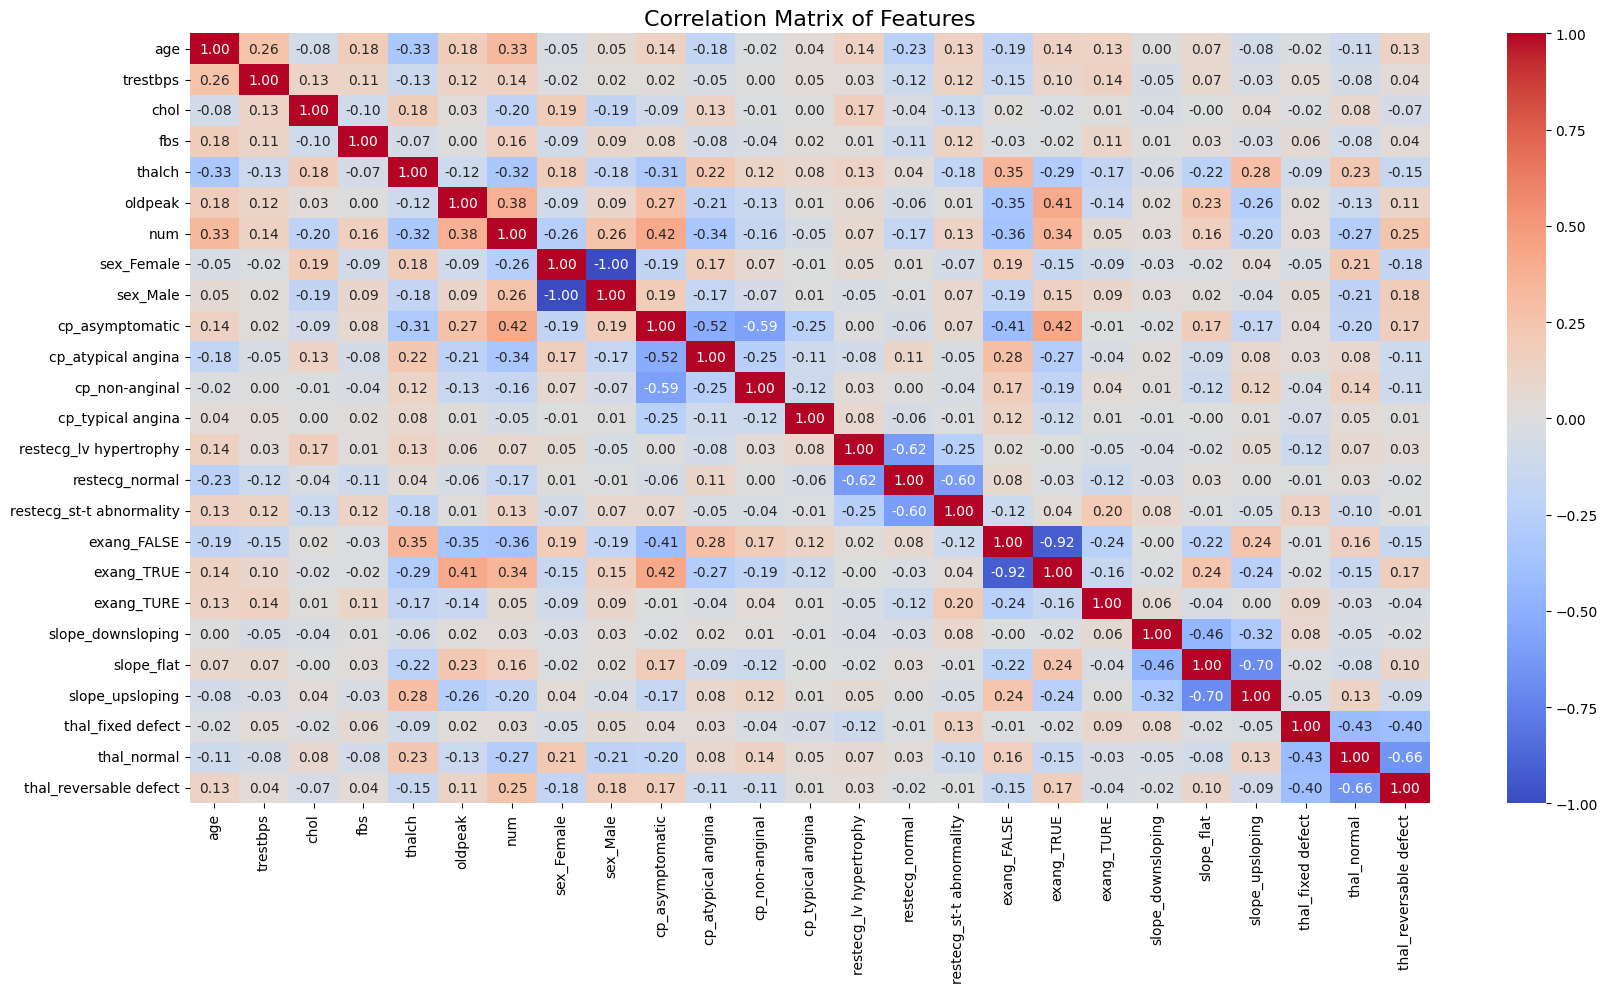

In [22]:
plt.figure(figsize=(20,10 ))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features', fontsize=16)
plt.show()

In [23]:
pd.set_option('display.max_columns', None)
df_encoded.head()

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_FALSE,exang_TRUE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,1,150,2,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
1,41,135,203,0,132,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0
2,57,140,192,0,148,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0
3,52,118,186,0,190,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0
4,57,110,201,0,126,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0


In [24]:
df3 = df_encoded

Split the dataset into training and testing sets (80-20 split)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = df3.drop(columns=['num'])
y = df3['num']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [29]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [30]:
y_pred = clf.predict(X_test)


In [31]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5604395604395604


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [33]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), average='macro', multi_class='ovr')

In [34]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.5604395604395604
Precision: 0.5417456553627369
Recall: 0.5604395604395604
F1 Score: 0.5493937109321725
ROC AUC Score: 0.6098307015919274


In [35]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score']
values = [accuracy, precision, recall, f1, roc_auc]

In [36]:
import plotly.graph_objects as go

In [37]:
fig = go.Figure(data=[go.Bar(x=metrics, y=values, marker_color=['blue', 'green', 'orange', 'purple', 'red'])])
fig.update_layout(title='Evaluation Metrics',
                  xaxis_title='Metrics',
                  yaxis_title='Score',
                  yaxis=dict(range=[0, 0.7]),
                  showlegend=False)
fig.show()

In [89]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [90]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1], pos_label=1)

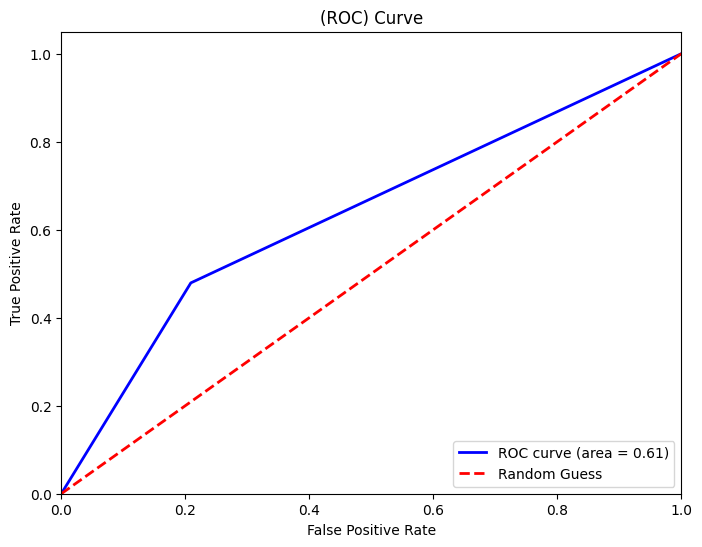

In [92]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Hyperparameter Tuning

In [1]:
from sklearn.model_selection import GridSearchCV

In [2]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']}


In [38]:
clf = DecisionTreeClassifier(random_state=42)

In [39]:
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [40]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}


In [41]:
best_clf = grid_search.best_estimator_

In [42]:
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Testing Set:", accuracy)

Accuracy on Testing Set: 0.5714285714285714


In [47]:
!pip install graphviz pydotplus

In [48]:
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

In [50]:
class_names = ['0', '1', '2', '3', '4']

In [51]:
# Export the decision tree to DOT format
dot_data = export_graphviz(best_clf, out_file=None,
                           feature_names=X_train.columns,
                           class_names=class_names,
                           filled=True, rounded=True,
                           special_characters=True)


In [52]:
# Create a Graphviz object
graph = pydotplus.graph_from_dot_data(dot_data)


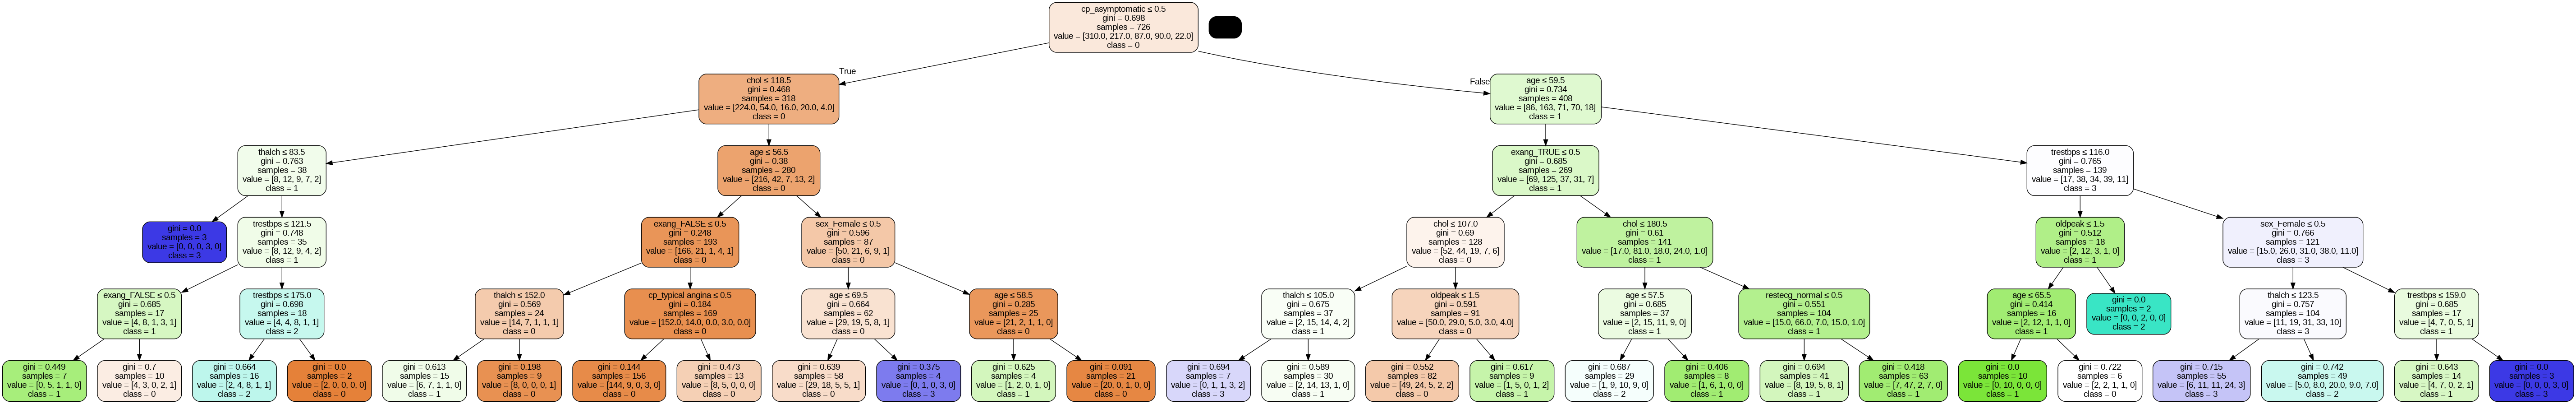

In [53]:
image = Image(graph.create_png())
display(image)


Results

**Performance Insights:**

Before Hyperparameter Tuning:

  Accuracy:    0.5604395604395604

  Precision: 0.5461145400228057

  Recall: 0.5604395604395604
  
  ROC AUC Score: 0.6267962426386677

After Hyperparameter Tuning:

  Best Parameters: {'criterion': 'gini',  'max_depth': 5,  'min_samples_split': 2}

  Accuracy on Testing Set: 0.5769230769230769

Interview Questions:

**What are some common hyperparameters of decision tree models, and how do they affect the model's performance?**

Decision tree models have several hyperparameters that can be tuned to optimize model performance. Some common hyperparameters include:

**Max Depth:** *Limits the tree's maximum depth. A more complicated model that can identify more complex patterns in the data may result from increasing this parameter, but there is a greater chance of overfitting.*

**Min Samples Split:** *Indicates how many samples are needed at the very least to split an internal node. By raising this parameter, overfitting can be lessened by preventing the tree from splitting too soon.*

**Criterion:** *Determines the function used to measure the quality of a split. Common criteria include Gini impurity and entropy. Choosing the right criterion depends on the nature of the data and the problem at hand.*

**Min Samples Leaf:** *Defines the bare minimum of samples that must be present at a leaf node. The tree can avoid overfitting by restricting the size of its leaves by increasing this value.*

**Max Features:** *Regulates how many features are taken into account while determining the optimal split. The complexity of the model can be decreased and its generalization performance enhanced by limiting the amount of features.*

**What is the difference between Label encoding and One-hot encoding?**

Both label encoding and one-hot encoding are techniques for transforming categorical variables into numerical representation, but they differ in their techniques and effects.

**Label Encoding:**

*In the encodiabel label. In a binary variable that has the categories "Male" and "Female," for instance, "Male" could be given the label 0 and "Female" the label 1. Ordinal variables, in which the categories have an innate order, are a good fit for label encoding. However, because it adds ordinality that might not be present in the data, it might not be appropriate for nominal variables.*

**One-hot Encoding:**

*Each category of a categorical variable is represented as a binary vector in one-hot encoding, where each element represents a single category. The vector's remaining elements are "cold" (0), but only one is "hot" (1), signifying the existence of that category.*

*n a binary variable that has the categories "Male" and "Female," for instance, "Male" could be represented as [1, 0] and "Female" as [0, 1].*

*Since one-hot encoding does not introduce any ordinality, it is appropriate for nominal variables.*

*However, when working with categorical variables that have a lot of categories, it can result in high-dimensional feature spaces.*